## Python OpenCV resize 圖片縮放
frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
### interpolation
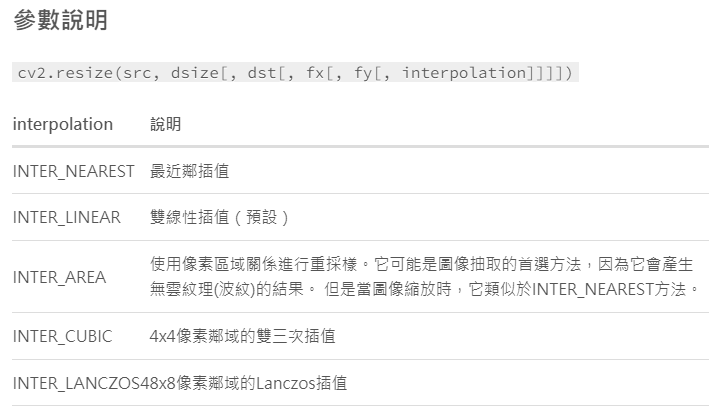

* 如果是要縮小圖片的話，通常 INTER_AREA 使用效果較佳。
* 如果是要放大圖片的話，通常 INTER_CUBIC 使用效果較佳，次等則是 INTER_LINEAR。
* 如果要追求速度的話，通常使用 INTER_NEAREST。

In [4]:
#video display
import cv2
cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cap.read()
    # print(ret) # ret is True or False
    # print(frame.shape) # (480, 640, 3)
    cv2.imshow('Input',frame)
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    cv2.imshow('resize', frame)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [5]:
#temporally subtraction simple
import cv2
cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
cur_frame, prev_frame = None, None
while True:
    ret, frame = cap.read()
    prev_frame = cur_frame
    cur_frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    if prev_frame is not None:
        sub_frame = cv2.absdiff(cur_frame , prev_frame) # 取兩個numpy陣列差的絕對值
        cv2.imshow('temporal subtraction', sub_frame)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

## %%writefile test
## Practice
1. Perform <b>Temporal Subtraction</b>. i.e., <i>abs(I(t)-I(t-1))</i> where <i>I(t)</i> is the captured image at time instant <i>t</i>.
2. Perform <b>Background Subtraction</b>. i.e., <i>abs(I(t)-I(0))</i> where <i>I(0)</i> is the first captured image after your program starts the execution.
3. Show the background image and both subtracted images.
4. Compare the differences. What is the pros and cons of these two methods?
5. Upload your Jupyter code file (*.ipynb)

In [1]:
#Temporal Subtraction and Background Subtraction.

import cv2
cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
first_frame, cur_frame, prev_frame = None, None, None
first_frame = cv2.resize(cap.read()[1],None,fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
while True:
    ret, frame = cap.read()
    prev_frame = cur_frame
    cur_frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    #Temporal Subtraction
    if prev_frame is not None:
        sub_frame = cv2.absdiff(cur_frame , prev_frame)
        cv2.imshow('temporal subtraction', sub_frame)
    #Background Subtraction
    if first_frame is not None:
        sub_frame2 = cv2.absdiff(cur_frame , first_frame)
        cv2.imshow('Background Subtraction.',sub_frame2)
    cv2.imshow(' background image',first_frame)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

### Compare the differences
Temporal Subtraction   能看見會動的物體輪廓，如果物體沒有移動時，就不會出現畫面。  
Background Subtraction 能看見新增的物體畫面，如果背景是黑色時，與人物頭髮相減後會呈現白色頭髮。

In [17]:
#motion history image

import cv2
alpha = 0.95
cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
ret, frame = cap.read()
cur_frame = mhi_frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
while True:
    ret, frame = cap.read()
    cur_frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    mhi_frame = cv2.addWeighted(mhi_frame, alpha, cur_frame, 1-alpha, 0)
    cv2.imshow('motion history image', mhi_frame)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

## %%writefile test
## Homework 1
1. Perform <b>Adaptive Background Subtraction</b>. i.e., <i>S(t)=abs(I(t)-B(t))</i> where <i>B(t)</i> is the adaptive background image.
2. Perform <b>Foreground Detection</b>. i.e., <i>F(t)=I(t) if S(t) > Threshold</i>
3. Show the captured image <i>I(t)</i>, the adaptive background image <i>B(t)</i>, the subtracted image <i>S(t)</i>, and the foreground image <i>F(t)</i>.
4. Adjust the alpha value and observe the result.
5. Any idea on how to generate a better Adaptive Background Image? Try it and compare the results.
6. Write down your observation and comparison at the end of your code by adding an individual cell in Jupyter.
7. Upload your Jupyter code file (*.ipynb)
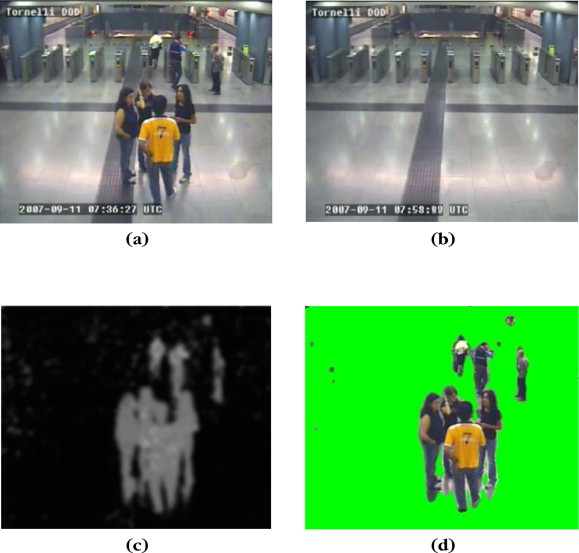

In [18]:
import cv2
import numpy as np
alpha = 0.99
cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
ret, frame = cap.read()
fore_img = cur_frame = mhi_frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
while True:
    ret, frame = cap.read()
    # captured image I(t)
    cur_frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    cv2.imshow('captured image I(t)',cur_frame)
    # adaptive background image B(t)
    mhi_frame = cv2.addWeighted(mhi_frame, alpha, cur_frame, 1-alpha, 0)
    cv2.imshow('Adaptive Background B(t)', mhi_frame)
    # subtracted image S(t)
    if mhi_frame is not None:
        sub_frame = cv2.absdiff(cur_frame , mhi_frame)
        cv2.imshow('subtracted image S(t)', sub_frame)
    
    # foreground image F(t), Threshold = 120
    bk = np.ones((480, 640, 3), dtype=int)*255
    fore_img = sub_frame
    for i in range(3):
        fore_img[:,:,i][fore_img[:,:,i] < 150] = 200
    cv2.imshow('foreground image F(t)', fore_img)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [10]:
print(sub_frame[:,:,0])

[[ 9 11  9 ...  5  6  6]
 [10 10  8 ...  5  5  5]
 [ 9  7  7 ...  9  4  3]
 ...
 [ 6  7  7 ... 18 19 14]
 [10  9  8 ... 14 16 15]
 [ 4  6  7 ... 14 18 16]]


In [10]:
import numpy as np
bk = np.ones((480, 640, 3), dtype=int)*255
print(bk)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
